In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn import datasets, linear_model


import warnings
warnings.filterwarnings("ignore")

# pd.set_option("display.max_rows", None)
# pd.set_option('display.max_columns', None)

To build my datasets, I used my own spotify data, gathered from the Spotify API, Spotipy. I made several different datasets and converted them into a pickle file to be read and used for analysis

In [2]:
#loading datasets
# top_artist_df = pd.read_pickle("top_artists.pkl")
# followed_artists_df = pd.read_pickle("followed_artists.pkl")
# top_tracks_df = pd.read_pickle("top_tracks.pkl")
saved_tracks_df = pd.read_pickle("saved_tracks.pkl")
# playlist_tracks_df = pd.read_pickle("playlist_tracks.pkl")
# recommendation_tracks_df = pd.read_pickle("recommendation_tracks.pkl")

Here is a link to the definitions of the variables used in this project, provided fro mthe Spotify API website =  https://developer.spotify.com/documentation/web-api/reference/#/operations/get-audio-features

In [3]:
saved_tracks_df = saved_tracks_df.dropna()
saved_tracks_df.isnull().sum()

#No missing values now

id                    0
name                  0
popularity            0
type                  0
is_local              0
explicit              0
duration_ms           0
disc_number           0
track_number          0
artist_id             0
artist_name           0
album_artist_id       0
album_artist_name     0
album_id              0
album_name            0
album_release_date    0
album_tracks          0
album_type            0
added_at              0
genres                0
album_genres          0
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
uri                   0
track_href            0
analysis_url          0
time_signature        0
dtype: int64

For my analysis, I think I will use my "Saved tracks" playlist, as I know most to all of the songs on here were saved by me to my profile because I enjoyed the songs/ albums specifically. So I think this should give me the best results for a recomendation engine

In [4]:
#I will use the saved tracks df as the standard df to explore the data before i plug into the models

df = saved_tracks_df

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1131 entries, 0 to 1132
Data columns (total 36 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  1131 non-null   object 
 1   name                1131 non-null   object 
 2   popularity          1131 non-null   int64  
 3   type                1131 non-null   object 
 4   is_local            1131 non-null   bool   
 5   explicit            1131 non-null   bool   
 6   duration_ms         1131 non-null   float64
 7   disc_number         1131 non-null   int64  
 8   track_number        1131 non-null   int64  
 9   artist_id           1131 non-null   object 
 10  artist_name         1131 non-null   object 
 11  album_artist_id     1131 non-null   object 
 12  album_artist_name   1131 non-null   object 
 13  album_id            1131 non-null   object 
 14  album_name          1131 non-null   object 
 15  album_release_date  1131 non-null   object 
 16  album_

In [6]:
df.describe()

,popularity,duration_ms,disc_number,track_number,album_tracks,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,1131.000000,1.131000e+03,1131.000000,1131.000000,1131.000000,1131.000000,1131.000000,1131.000000,1131.000000,1131.000000,1131.000000,1131.000000,1131.000000,1131.000000,1131.000000,1131.000000,1131.000000
mean,37.955791,2.264988e+05,1.030946,7.564987,15.397878,0.654366,0.638351,5.118479,-7.795114,0.586207,0.203759,0.212107,0.083638,0.220468,0.457591,120.859501,3.943413
std,23.944068,1.022765e+05,0.331151,5.483198,10.061095,0.176661,0.208335,3.743800,4.391444,0.492730,0.168204,0.273565,0.227229,0.171339,0.233079,30.476247,0.386015
min,0.000000,1.373300e+04,1.000000,1.000000,1.000000,0.000000,0.002690,0.000000,-37.894000,0.000000,0.000000,0.000010,0.000000,0.025100,0.000000,0.000000,0.000000
25%,21.000000,1.771040e+05,1.000000,3.000000,12.000000,0.537500,0.524000,1.000000,-8.920000,0.000000,0.061150,0.019750,0.000000,0.104500,0.274000,95.459500,4.000000
50%,42.000000,2.180930e+05,1.000000,7.000000,14.000000,0.677000,0.663000,5.000000,-6.827000,1.000000,0.165000,0.082200,0.000002,0.147000,0.447000,122.035000,4.000000
75%,56.000000,2.685200e+05,1.000000,11.000000,18.000000,0.788500,0.784000,8.000000,-5.218000,1.000000,0.300500,0.282500,0.002060,0.306000,0.636000,141.962000,4.000000
max,91.000000,1.661627e+06,11.000000,32.000000,204.000000,0.978000,0.997000,11.000000,-0.777000,1.000000,0.959000,0.995000,0.960000,0.974000,0.974000,209.909000,5.000000


In [7]:
df.head(10)

# can see my music choices vary, between rap/hip hop, to 1940s chinese, to classical, to Hard Rock. 
# The diversity of music taste should make for interesting reccomendations

,id,name,popularity,type,is_local,explicit,duration_ms,disc_number,track_number,artist_id,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,uri,track_href,analysis_url,time_signature
0,6xgwv5ao2qYqmpkuG1etFc,Minor Waltz,6,audio_features,False,False,228893.0,1,2,3zz4BITBs6xvnzw2vtQi2D,...,0.0519,0.7340,0.053400,0.1550,0.1580,119.908,spotify:track:6xgwv5ao2qYqmpkuG1etFc,https://api.spotify.com/v1/tracks/6xgwv5ao2qYq...,https://api.spotify.com/v1/audio-analysis/6xgw...,3.0
1,3CFR1oY47Ph2fULELeH6Rd,Schindler's List Theme,1,audio_features,False,False,225373.0,1,12,3dRfiJ2650SZu6GbydcHNb,...,0.0517,0.8950,0.273000,0.0643,0.0637,47.542,spotify:track:3CFR1oY47Ph2fULELeH6Rd,https://api.spotify.com/v1/tracks/3CFR1oY47Ph2...,https://api.spotify.com/v1/audio-analysis/3CFR...,4.0
2,2HCs8VTLo6Vkzu06gVt1C1,瘋狂世界,8,audio_features,False,False,170160.0,1,9,1bONVLlQIiuULYblokrPxj,...,0.0370,0.9930,0.634000,0.1310,0.7760,179.136,spotify:track:2HCs8VTLo6Vkzu06gVt1C1,https://api.spotify.com/v1/tracks/2HCs8VTLo6Vk...,https://api.spotify.com/v1/audio-analysis/2HCs...,4.0
3,5B0qLRZewG1huy6o2JgQAo,交換,2,audio_features,False,False,195507.0,1,8,1bONVLlQIiuULYblokrPxj,...,0.0423,0.9910,0.393000,0.0968,0.2960,118.056,spotify:track:5B0qLRZewG1huy6o2JgQAo,https://api.spotify.com/v1/tracks/5B0qLRZewG1h...,https://api.spotify.com/v1/audio-analysis/5B0q...,4.0
4,0vDU9V9SLZgqkQJ68HhnEU,Element,32,audio_features,False,True,131056.0,1,1,0cHInYwq4GHrC3UotzgVQw,...,0.4070,0.0759,0.000000,0.1080,0.5710,139.746,spotify:track:0vDU9V9SLZgqkQJ68HhnEU,https://api.spotify.com/v1/tracks/0vDU9V9SLZgq...,https://api.spotify.com/v1/audio-analysis/0vDU...,4.0
5,6Gifhuvyk4uPDGSRrtw8Y6,"Schwanengesang, D. 957: Ständchen ""Leise flehe...",52,audio_features,False,False,260000.0,1,12,2p0UyoPfYfI76PCStuXfOP,...,0.0453,0.9800,0.905000,0.0900,0.0555,178.716,spotify:track:6Gifhuvyk4uPDGSRrtw8Y6,https://api.spotify.com/v1/tracks/6Gifhuvyk4uP...,https://api.spotify.com/v1/audio-analysis/6Gif...,3.0
6,0vf2eBw2inhl8y61cYQMv2,Devil Town,82,audio_features,False,False,179955.0,1,8,2hR4h1Cao2ueuI7Cx9c7V8,...,0.0599,0.1200,0.000000,0.1210,0.5010,99.969,spotify:track:0vf2eBw2inhl8y61cYQMv2,https://api.spotify.com/v1/tracks/0vf2eBw2inhl...,https://api.spotify.com/v1/audio-analysis/0vf2...,4.0
7,6K0LB4XItoRSkKZSkVTS4d,Substance Abuse,13,audio_features,False,True,212245.0,1,8,3kf0gOpxWtkyeMNJVDQPtd,...,0.3440,0.2120,0.000004,0.1810,0.5760,90.510,spotify:track:6K0LB4XItoRSkKZSkVTS4d,https://api.spotify.com/v1/tracks/6K0LB4XItoRS...,https://api.spotify.com/v1/audio-analysis/6K0L...,4.0
8,3TXy6nchgKeYlVwOKNk9lE,100 Shots,73,audio_features,False,True,264819.0,1,1,3HiuzBlSW7pGDXlSFMhO2g,...,0.2500,0.1350,0.000005,0.0583,0.1540,134.006,spotify:track:3TXy6nchgKeYlVwOKNk9lE,https://api.spotify.com/v1/tracks/3TXy6nchgKeY...,https://api.spotify.com/v1/audio-analysis/3TXy...,4.0
9,2MEhck5D2vq7kPRkfJ93HI,Everybody Know,54,audio_features,False,True,147173.0,1,15,3HiuzBlSW7pGDXlSFMhO2g,...,0.2910,0.0270,0.000000,0.1710,0.4700,123.958,spotify:track:2MEhck5D2vq7kPRkfJ93HI,https://api.spotify.com/v1/tracks/2MEhck5D2vq7...,https://api.spotify.com/v1/audio-analysis/2MEh...,4.0


In [8]:
#Getting an idea of the top artists, seems to be representative to my actual tastes for the most part
df.artist_name.value_counts().head(20)

Eminem                51
The Underachievers    45
Lil Wayne             40
Kanye West            34
Kendrick Lamar        32
Onra                  32
Flatbush Zombies      31
Future                31
Guns N' Roses         26
Tech N9ne             24
Jarren Benton         23
Scissor Sisters       23
Radiohead             20
The Roots             20
JAY-Z                 17
Gunna                 17
Sean Paul             17
Young Dolph           17
Logic                 17
Mobb Deep             16
Name: artist_name, dtype: int64

In [9]:
#Sorting by danceability to understand this variable a bit more
df = df.sort_values('danceability', ascending = False)
df.head(10)

,id,name,popularity,type,is_local,explicit,duration_ms,disc_number,track_number,artist_id,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,uri,track_href,analysis_url,time_signature
462,3y8uX01MoDAeaXjwxKKZ5h,Tits On The Radio,31,audio_features,False,False,194360.0,1,6,3Y10boYzeuFCJ4Qgp53w6o,...,0.0411,0.01190,0.000277,0.1060,0.702,114.011,spotify:track:3y8uX01MoDAeaXjwxKKZ5h,https://api.spotify.com/v1/tracks/3y8uX01MoDAe...,https://api.spotify.com/v1/audio-analysis/3y8u...,4.0
986,7rZVhJBmuX6TLo1h2PTv7Z,Wowzerz,39,audio_features,False,True,225360.0,1,13,55Aa2cqylxrFIXC767Z865,...,0.1260,0.00291,0.000000,0.0845,0.810,130.011,spotify:track:7rZVhJBmuX6TLo1h2PTv7Z,https://api.spotify.com/v1/tracks/7rZVhJBmuX6T...,https://api.spotify.com/v1/audio-analysis/7rZV...,4.0
110,3jIngQ3hgLgIv3tMSzrQa6,A Goat & A Dolphin,54,audio_features,False,True,149760.0,1,19,3HiuzBlSW7pGDXlSFMhO2g,...,0.0939,0.02220,0.000000,0.1360,0.279,129.978,spotify:track:3jIngQ3hgLgIv3tMSzrQa6,https://api.spotify.com/v1/tracks/3jIngQ3hgLgI...,https://api.spotify.com/v1/audio-analysis/3jIn...,4.0
806,0fGh0trRN1xz3s41r7V5ce,Shake That,75,audio_features,False,True,274440.0,1,7,7dGJo4pcD2V6oG8kP0tJRR,...,0.1170,0.05070,0.000049,0.1570,0.534,107.005,spotify:track:0fGh0trRN1xz3s41r7V5ce,https://api.spotify.com/v1/tracks/0fGh0trRN1xz...,https://api.spotify.com/v1/audio-analysis/0fGh...,4.0
18,2sRH0V7gWZ9p3QHfqhhOk8,Sexy Black Timberlake,53,audio_features,False,True,223103.0,1,1,4cUkGQyhLFqKHBtL58HYVp,...,0.4230,0.01180,0.008570,0.1140,0.648,116.846,spotify:track:2sRH0V7gWZ9p3QHfqhhOk8,https://api.spotify.com/v1/tracks/2sRH0V7gWZ9p...,https://api.spotify.com/v1/audio-analysis/2sRH...,4.0
200,4m6pJrmjFrHkTX5HmliI7W,Yes Indeed,31,audio_features,False,True,142693.0,1,2,5f7VJjfbwm532GiveGC0ZK,...,0.5370,0.03590,0.000000,0.0996,0.573,119.931,spotify:track:4m6pJrmjFrHkTX5HmliI7W,https://api.spotify.com/v1/tracks/4m6pJrmjFrHk...,https://api.spotify.com/v1/audio-analysis/4m6p...,4.0
333,1FsnTycveplwrTPRjJwbwr,Almighty (feat. Hoodrich Pablo Juan),0,audio_features,False,True,144407.0,1,3,2hlmm7s2ICUX0LVIhVFlZQ,...,0.4790,0.22300,0.000013,0.1130,0.274,118.006,spotify:track:1FsnTycveplwrTPRjJwbwr,https://api.spotify.com/v1/tracks/1FsnTycveplw...,https://api.spotify.com/v1/audio-analysis/1Fsn...,4.0
153,0fBFqCn0EpJndtNzhpLLe2,Black Joe Dirt,39,audio_features,False,True,110806.0,1,1,3WjxW7xt0RCSotYoQBzEXB,...,0.2260,0.23500,0.000000,0.3330,0.771,123.926,spotify:track:0fBFqCn0EpJndtNzhpLLe2,https://api.spotify.com/v1/tracks/0fBFqCn0EpJn...,https://api.spotify.com/v1/audio-analysis/0fBF...,4.0
812,4S06iZrLlGsSqKlK6paOv8,Just Lose It,55,audio_features,False,True,248600.0,1,15,7dGJo4pcD2V6oG8kP0tJRR,...,0.0501,0.06560,0.000065,0.2560,0.945,121.008,spotify:track:4S06iZrLlGsSqKlK6paOv8,https://api.spotify.com/v1/tracks/4S06iZrLlGsS...,https://api.spotify.com/v1/audio-analysis/4S06...,4.0
821,5v8F7GFQgmCESBpPFbC9DN,The Real Slim Shady,59,audio_features,False,True,284800.0,1,11,7dGJo4pcD2V6oG8kP0tJRR,...,0.0547,0.03370,0.000000,0.0424,0.777,104.495,spotify:track:5v8F7GFQgmCESBpPFbC9DN,https://api.spotify.com/v1/tracks/5v8F7GFQgmCE...,https://api.spotify.com/v1/audio-analysis/5v8F...,4.0


interesting to see danceability charted, the worst songs to dance to logically make sense as they are classical, or intro skits to albums with just words.

when charted in reverse, the songs with the highest danceability are rap or hip hop or EDM type songs. make sense. I will now explore energy with danceability

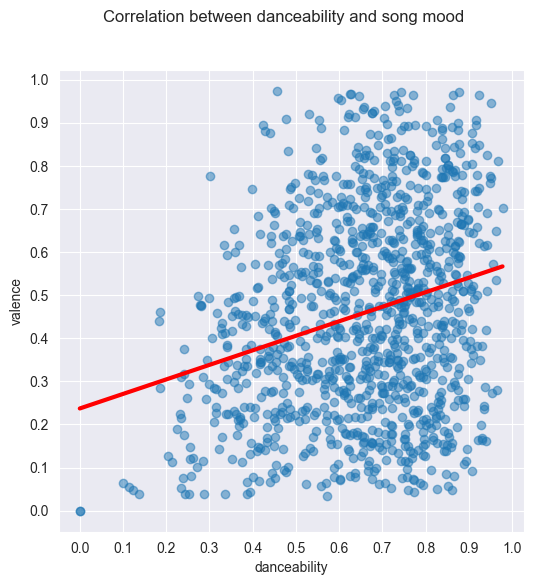

In [10]:
x = df["danceability"].values
y = df["valence"].values

x = x.reshape(x.shape[0], 1)
y = y.reshape(y.shape[0], 1)

regr = linear_model.LinearRegression()
regr.fit(x, y)

fig = plt.figure(figsize=(6, 6))
fig.suptitle("Correlation between danceability and song mood")

ax = plt.subplot(1, 1, 1)
ax.scatter(x, y, alpha=0.5)
ax.plot(x, regr.predict(x), color="red", linewidth=3)
plt.xticks(())
plt.yticks(())

ax.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.02))

ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.02))

plt.xlabel("danceability")
plt.ylabel("valence")

plt.show()

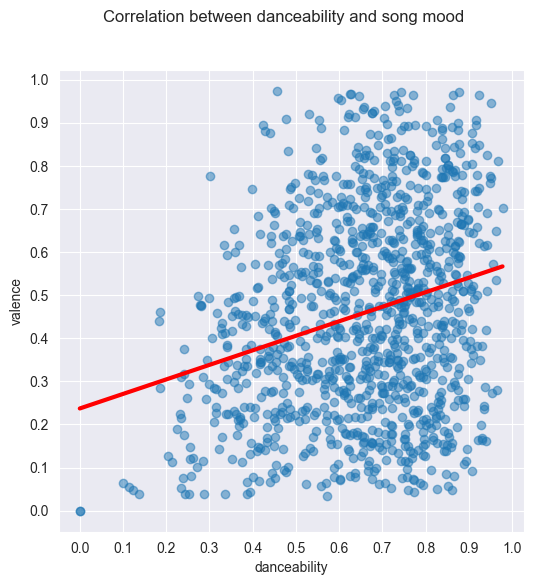

In [11]:
# Extract danceability and valence values from a dataframe
x = df["danceability"].values
y = df["valence"].values

# Reshape the arrays to have a single feature column
x = x.reshape(x.shape[0], 1)
y = y.reshape(y.shape[0], 1)

# Create a linear regression object and fit it to the data
regr = linear_model.LinearRegression()
regr.fit(x, y)

# Create a new figure for plotting
fig = plt.figure(figsize=(6, 6))

# Add a title to the figure
fig.suptitle("Correlation between danceability and song mood")

# Add a subplot to the figure
ax = plt.subplot(1, 1, 1)

# Add a scatter plot of the data to the subplot
ax.scatter(x, y, alpha=0.5)

# Add a line plot of the linear regression model to the subplot
ax.plot(x, regr.predict(x), color="red", linewidth=3)

# Remove tick labels from both axes
plt.xticks(())
plt.yticks(())

# Set major and minor tick locators for the x-axis
ax.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.02))

# Set major and minor tick locators for the y-axis
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.02))

# Add labels for the x and y axes
plt.xlabel("danceability")
plt.ylabel("valence")

# Display the plot
plt.show()

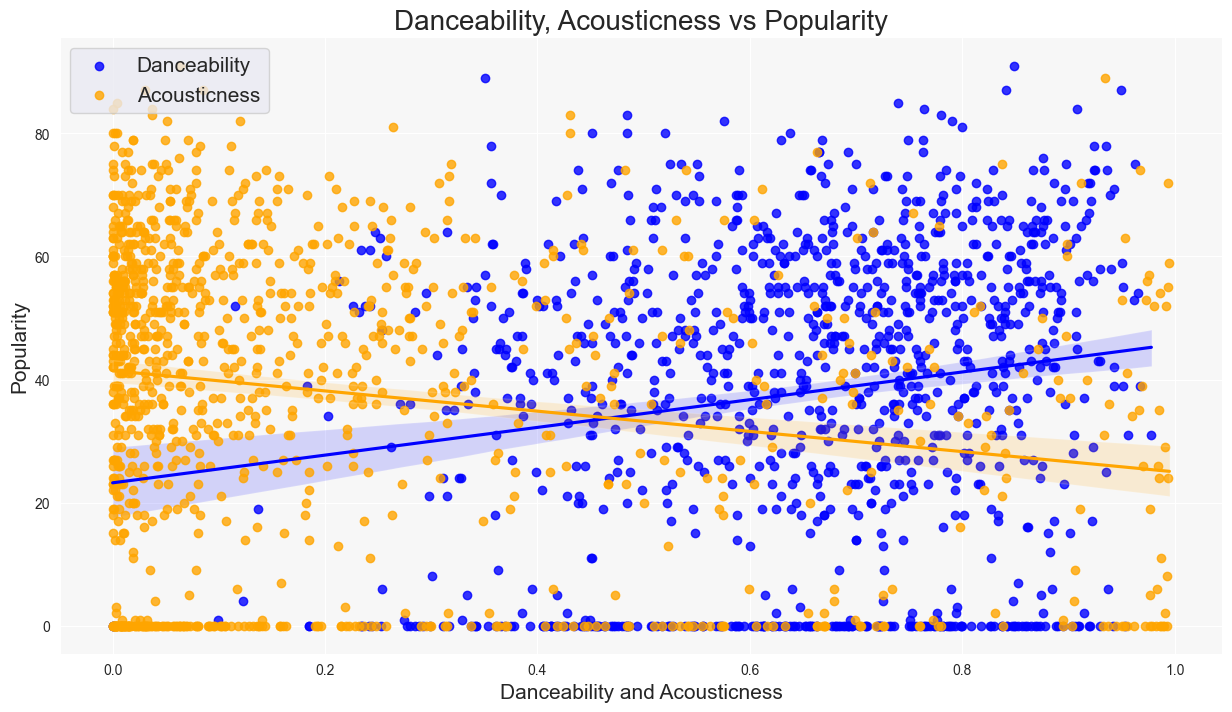

In [23]:
# Create a figure and axis object with a specified size
fig, ax = plt.subplots(figsize=(15, 8))

# Create a scatter plot with a regression line for danceability vs popularity
sns.regplot(x=df['danceability'], y=df['popularity'], color='b', label='Danceability', scatter=True, ax=ax)

# Create a scatter plot with a regression line for acousticness vs popularity
sns.regplot(x=df['acousticness'], y=df['popularity'], color='orange', label='Acousticness', scatter=True, ax=ax)

# Set the title and font size for the plot
ax.set_title('Danceability, Acousticness vs Popularity', fontsize=20)

# Set the label and font size for the x-axis
ax.set_xlabel('Danceability and Acousticness', fontsize=15)

# Set the label and font size for the y-axis
ax.set_ylabel('Popularity', fontsize=15)

# Set the font size and location of the legend
ax.legend(fontsize=15, loc='upper left')

# Set the background color for the plot
ax.set_facecolor('#F7F7F7')

# Remove the top and right spines of the plot
sns.despine()

# Display the plot
plt.show()

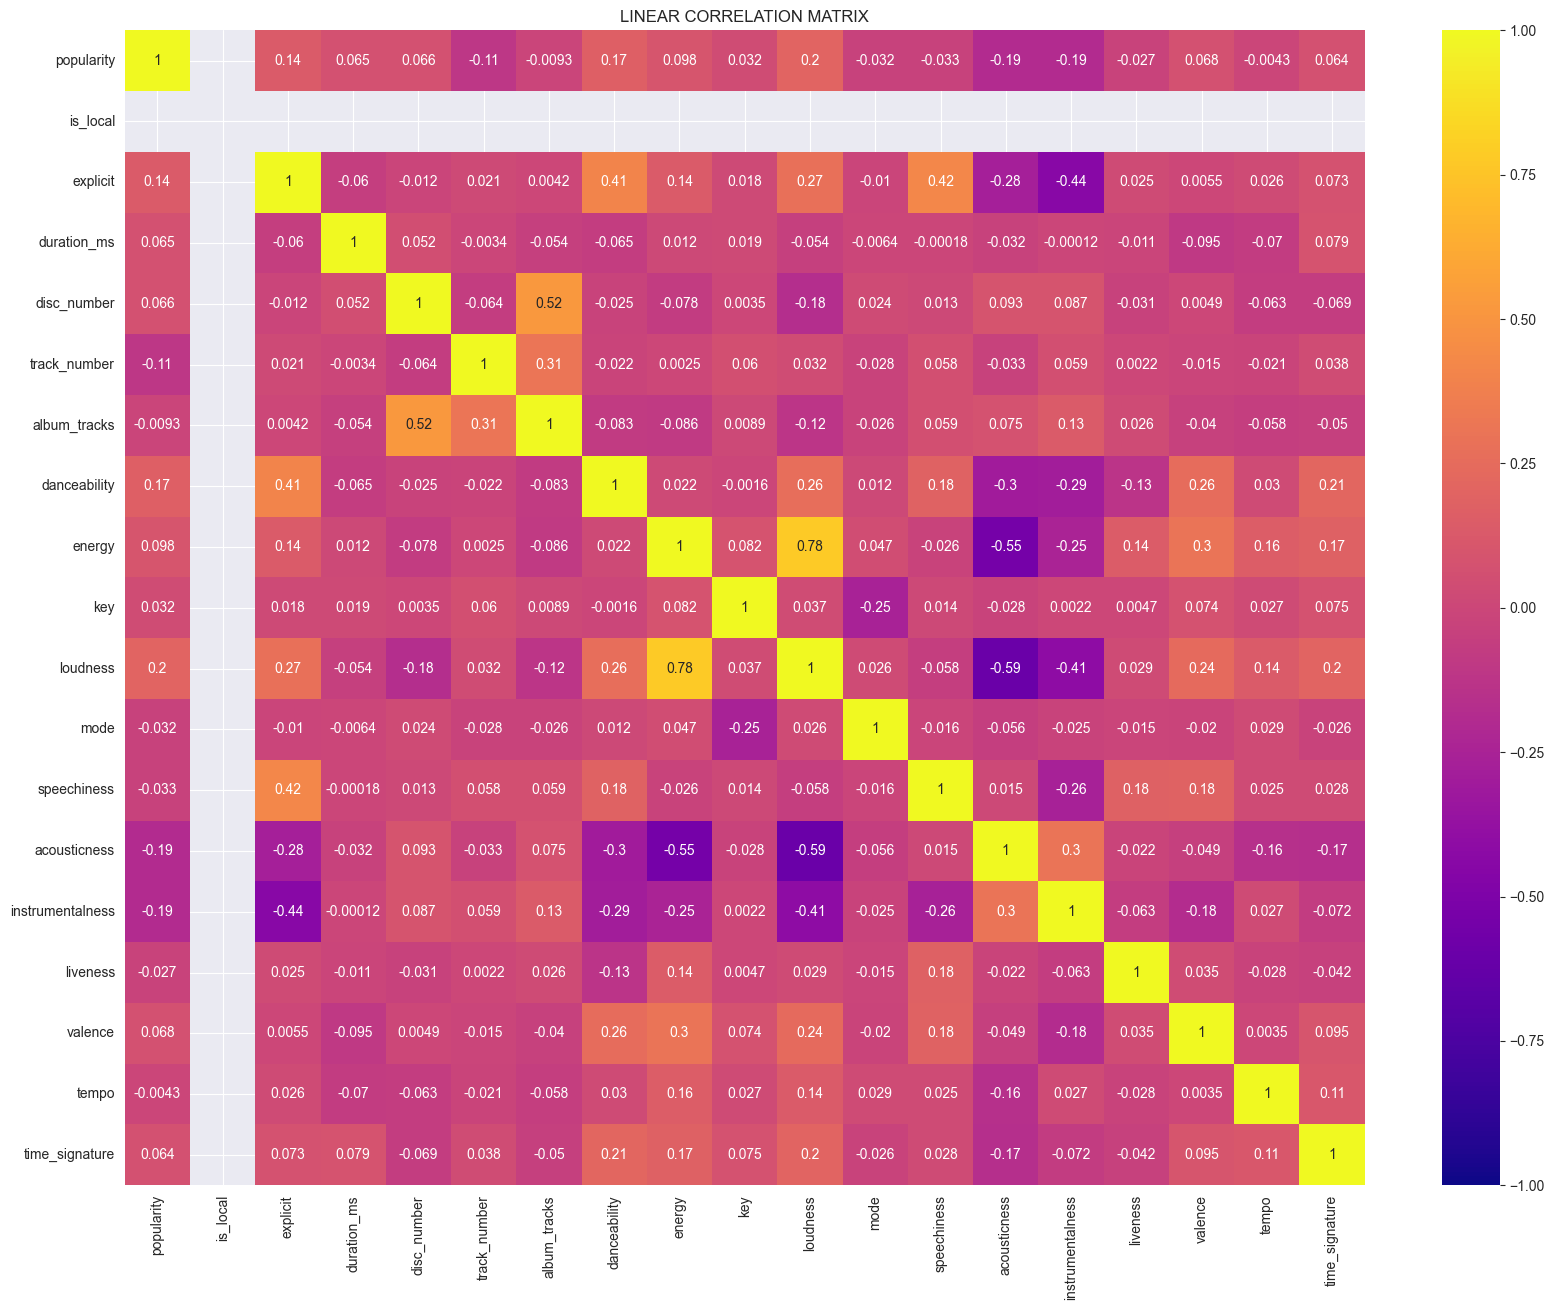

In [12]:
# Plot linear correlation matrix
fig,ax=plt.subplots(figsize=(20,15))
sns.heatmap(df.corr(),annot=True,cmap='plasma',vmin=-1,vmax=1,center=0,ax=ax)
plt.title('LINEAR CORRELATION MATRIX')
plt.show()

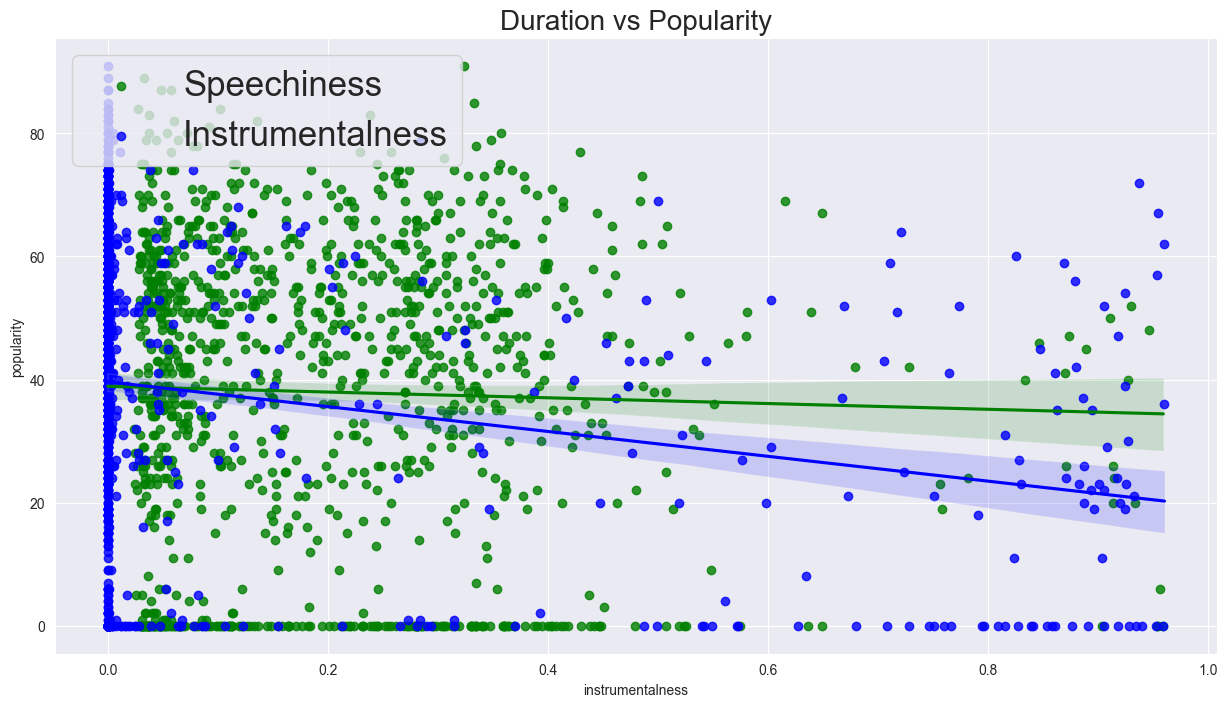

In [14]:
fig, ax = plt.subplots(figsize=(15,8))

sns.regplot(
    x= df['speechiness'],
    y= df['popularity'],
    color = 'g',
    label = 'Speechiness',
    scatter=True).set_title('Duration vs Popularity', fontsize = 20)

sns.regplot(
    x= df['instrumentalness'],
    y= df['popularity'],
    color = 'b',
    label = 'Instrumentalness',
    scatter=True)

ax.legend(fontsize = 25, loc = 'upper left')

#when it comes to speechiness and instrumentalness, more of each seem to indicate a negative correlation,
#but only very slightly, could be a result of a large majority of songs with 0 instrumentalness

Text(0.5, 0, 'Song Length')

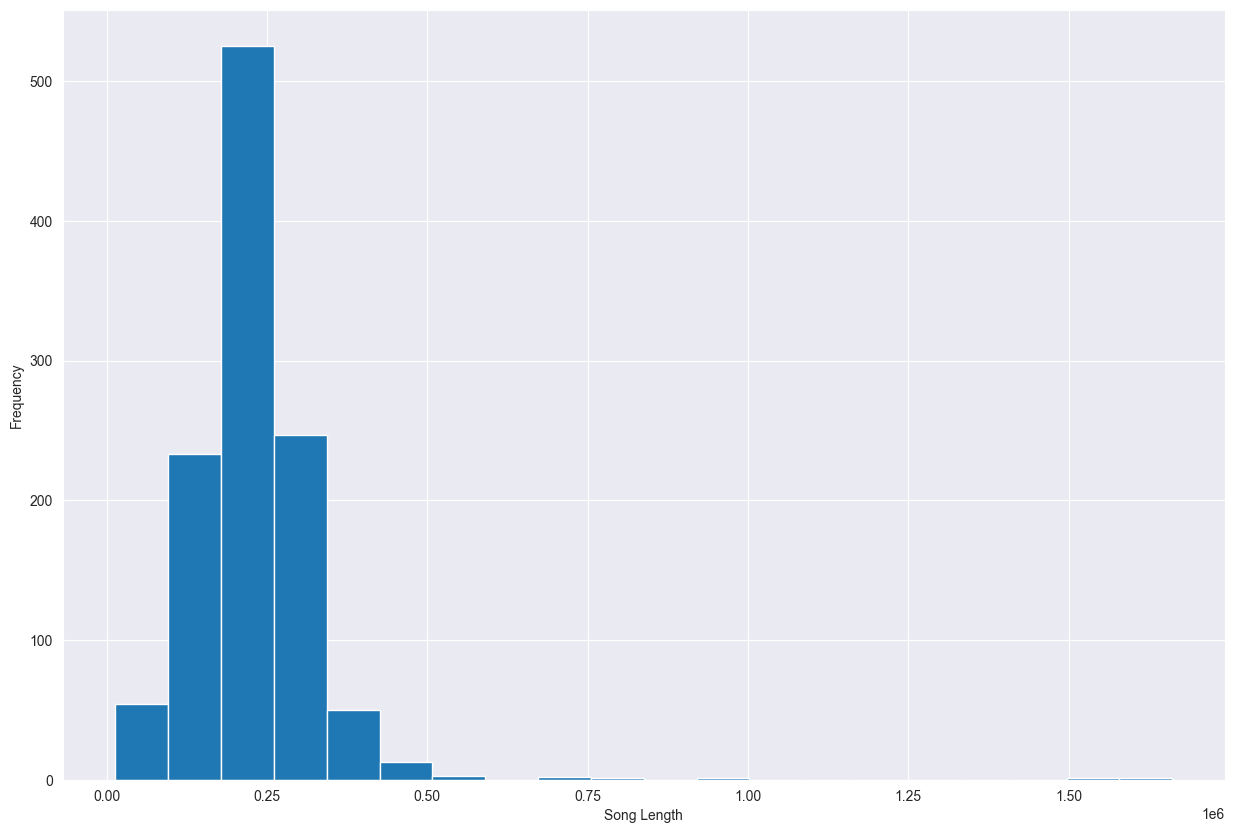

In [15]:
ax = df.duration_ms.plot(kind = 'hist', bins=20, figsize=(15, 10))
ax.set_xlabel('Song Length')